In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

raw_data = pd.read_csv('hotel_bookings.csv')

In [127]:
raw_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [128]:
raw_data.shape

(119390, 32)

In [129]:
raw_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [130]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [131]:
raw_data.isnull().sum().sort_values(ascending=False).head(10)

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In [132]:
# percentage of missing values compare to the number of all cells
missing_values = raw_data.isnull().sum()
total_cells = np.product(raw_data.shape)
total_missing = missing_values.sum()
missing_percentage = (total_missing/ total_cells)*100
print(total_cells)
print(total_missing)
missing_percentage

3820480
129425


3.387663330262166

 %3 of missing data seems okay to ignore and drop all the rows contains na value but I need to dig deeper to understand why it is missing.

In [133]:
raw_data.company.value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [134]:
raw_data.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

After I find the documentation of this dataset from here(https://www.sciencedirect.com/science/article/pii/S2352340918315191), I realized that "company" column is for the entity made the booking. So for the agency and company I can ignore the na values however there are two other columns contain null values which I will fill with the mode() function. The yare country and children columns.


In [135]:
#filling na values with the most occured values with the mode fucntion
raw_data['country'].fillna(raw_data.country.mode().to_string(),inplace = True)

In [136]:
#checking if it worked
raw_data.country.isna().value_counts()

False    119390
Name: country, dtype: int64

In [137]:
#filling na values with the most occured values with the mode fucntion
raw_data['children'].fillna(raw_data.children.mode(),inplace = True)

In [149]:
#converting float type to integer
raw_data['children'].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: children, Length: 119390, dtype: int32

In [138]:
raw_data.children.isna().value_counts()

False    119390
Name: children, dtype: int64

In [139]:
raw_data.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
hotel                                  0
is_canceled                            0
reservation_status                     0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment                         0
country                                0
meal                                   0
babies                                 0
children                               0
adults                                 0
stays_in_week_ni

What is the percentage of booking for each year?


In [140]:
#percentage number of booking for each year among the all bookings
raw_data.arrival_date_year.value_counts(normalize=True).sort_values(ascending=False).reindex([2015,2016,2017])         

2015    0.184237
2016    0.474973
2017    0.340791
Name: arrival_date_year, dtype: float64

Which was the most booked accommodation type (Single, Couple, Family)?


In [170]:
#deleting the outliers
raw_data.drop(raw_data[raw_data['adults']==0].index)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,guest_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,single
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,single
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,couple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,couple
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,friends
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,couple
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,couple


In [172]:
#I checked the documentation and there are no explanation of the customer type so I will create my own

conditions = [(raw_data['adults'] == 1),
(raw_data['adults'] == 2) & (raw_data['children']==0) &(raw_data['babies']==0),
(raw_data['adults'] >= 2) & (raw_data['children']>0)|(raw_data['babies']>0),
(raw_data['adults'] > 2)
]

#value names for conditions
values = ['single','couple','family','friends']

raw_data['guest_type'] = np.select(conditions,values)

raw_data.guest_type.value_counts(normalize=True).plot(kind='bar',figsize=(12,10))

Which hotel was prefered by whom?

<AxesSubplot:xlabel='guest_type,hotel'>

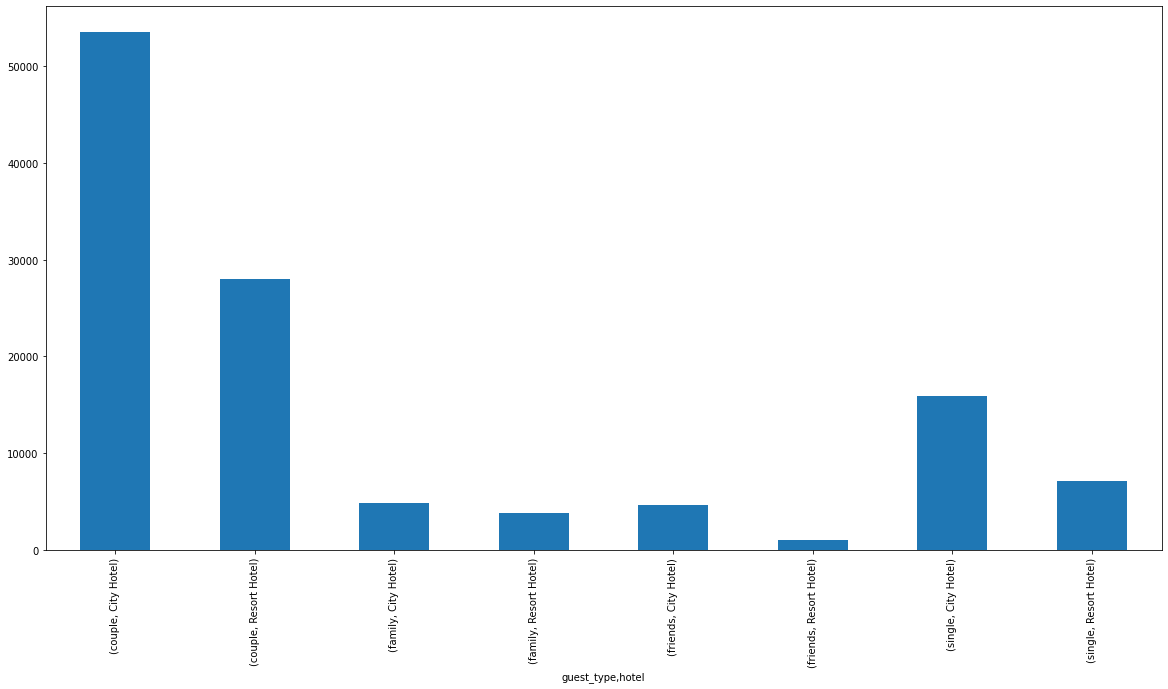

In [178]:
#hotel comparison by customer type
raw_data.groupby(['guest_type','hotel'])['hotel'].count().plot(kind='bar',figsize=(20,10))

Percentage of customer preferred the same hotel over years?

In [220]:
raw_data.groupby('arrival_date_year')['is_repeated_guest'].sum()

arrival_date_year
2015     632
2016    1752
2017    1370
Name: is_repeated_guest, dtype: int64

Only 3 percent of customers have decided to stay in the same hotel during their visit. Maybe because of the coditions of the hotel or they never visited the city again.

Where do these customers come from?

<AxesSubplot:xlabel='country'>

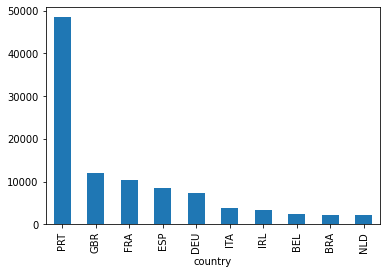

In [189]:
raw_data.groupby('country')['hotel'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(20,10))

It seems like most of the customers within the country, international customers either don't come to Portugal much or they don't prefer these two hotels. 

# Let's move to the customer who canceled their trip

# How many bookings were canceled?

<AxesSubplot:>

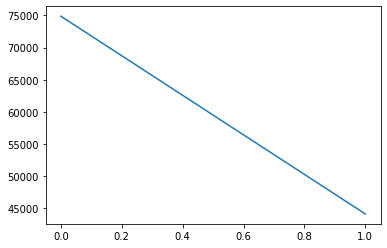

In [214]:
raw_data.is_canceled.value_counts()

Looks like more than half of the booking got canceled. 44115 is the exact number for it.

Cancelation ratio?

In [ ]:
canceled_data = raw_data[raw_data['is_canceled'] == 1]
not_canceled_data  = raw_data[raw_data['is_canceled'] == 0]

In [ ]:
no_cancel = (raw_data['is_canceled'] == 0).sum()
cancel = (raw_data['is_canceled'] == 1).sum()
ratio = cancel / no_cancel
ratio

0.5883511161961525

60 percent overall cancelation is a biggest issue for a business to tackle. Hotels take steps accordingly.

Which month has the highest number of cancelations?


<AxesSubplot:xlabel='arrival_date_month,hotel'>

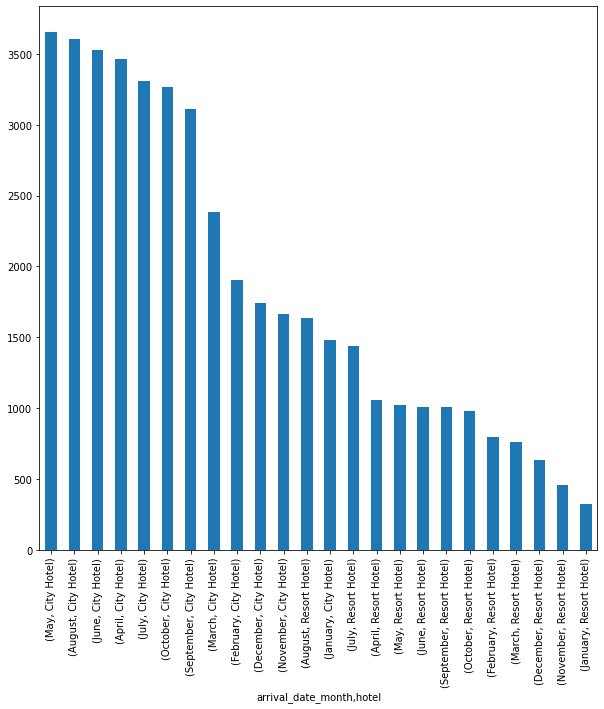

In [ ]:
canceled_data_by_month = raw_data[raw_data['is_canceled']==1].groupby('arrival_date_month')['hotel'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))
canceled_data_by_month
plt.xlabel('')
#sns.histplot(canceled_data, kde=True)

City hotel's number of cancelation is out of roof compared to Resort Hotel, and most of them occured during the season that most of the hotels make money which starts on April ends October. But what can be the reason to this?
-Do customers found cheaper price?
-Do their request couldn't be fullfilled?
-Do their trips canceled because of an emergency? 
...

I double checked the dataset and I have noticed a reserved and assigned room type difference. It may be one of the reason of cancelation. Let me dig in.

In [ ]:
all_canceled_cells = np.product(canceled_data.babies.shape)
canceled_room_difference = (canceled_data.reserved_room_type != canceled_data.assigned_room_type).sum()
canceled_room_difference / all_canceled_cells *100

In [ ]:
all_not_canceled_cells = np.product(not_canceled_data.babies.shape)

not_canceled_room_difference = (not_canceled_data.reserved_room_type != not_canceled_data.assigned_room_type).sum()
not_canceled_room_difference/all_not_canceled_cells*100

hmm... my hypothesis got falsified because among all canceled bookings only 2 percent of room type don't match. However, after I gave a second thoght I realize that for a room to be issued you have to start your trip

From which country these customers come from?

<AxesSubplot:>

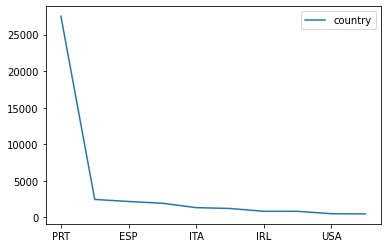

In [205]:


pd.DataFrame(canceled_data.country.value_counts().head(10)).plot(kind='line')


Half of the customers from Portugal have canceled their booking. It is really big number to consider as a biggest problem of the business is facing at the moment because the hotels are preffered by locals and half of them are canceling their trip.  

What about the effect of deposit and cancelation?

In [206]:
canceled_data.deposit_type.value_counts()

No Deposit    29694
Non Refund    14494
Refundable       36
Name: deposit_type, dtype: int64

In [208]:
not_canceled_data.deposit_type.value_counts()

No Deposit    74947
Refundable      126
Non Refund       93
Name: deposit_type, dtype: int64

My suggestion/hypothesis was hotels may have a product which price is reduced by %20 but non-refundable deposit however, strangely enough, customers who canceled their trip have paid non-refundable deposit yet canceled their trip anyway.

# What is the busiest month for the hotels?

<AxesSubplot:xlabel='arrival_date_month'>

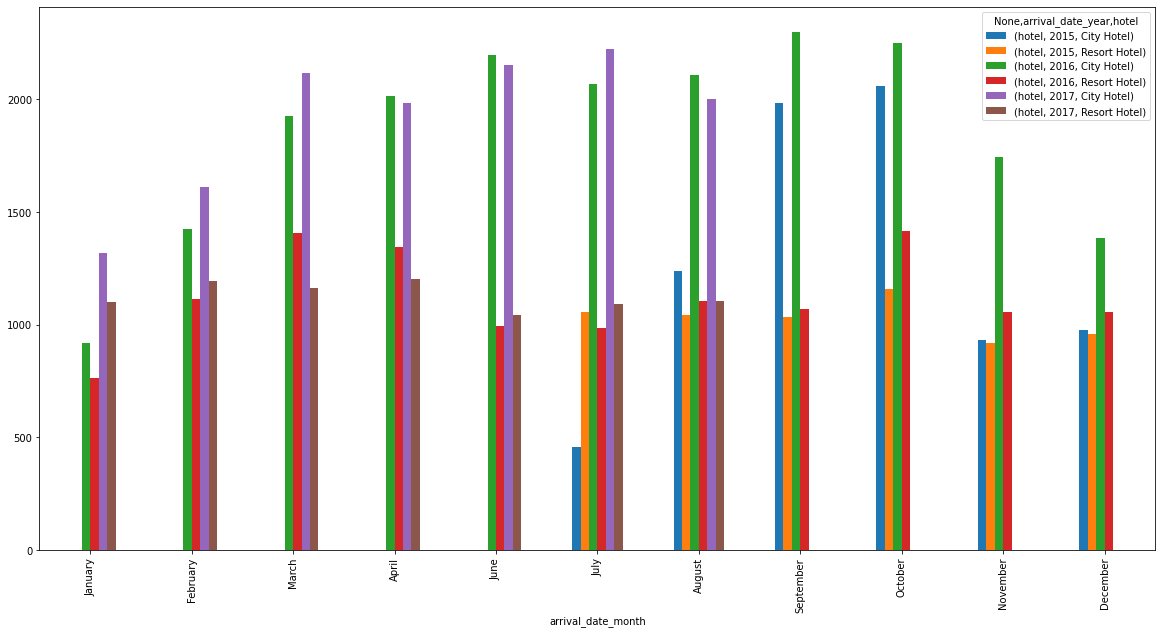

In [216]:
raw_data[raw_data['is_canceled']==0].pivot_table(index='arrival_date_month',columns=['arrival_date_year','hotel'],aggfunc={'hotel':'count'}).reindex(['January','February','March','April','June','July','August','September','October','November','December']).plot(kind='bar',figsize=(20,10))


-2015 January-June data is missing.
-City hotel always outnumbered the Resort hotel in every way
Busiest months are September and October

# What is the booking ratio between Resort Hotel and City Hotel?


In [217]:
raw_data.hotel.value_counts(normalize=True)

City Hotel      0.663434
Resort Hotel    0.336566
Name: hotel, dtype: float64

In [218]:
not_canceled_data.hotel.value_counts(normalize=True)

City Hotel      0.615012
Resort Hotel    0.384988
Name: hotel, dtype: float64

**Findings:

- 58% of booking got canceled.
- 66 percent of booking made by City Hotel. 61% after cancelation.
- 2016 is the year that customers decided to stay in the same hotel. More than 50% increased compared to previous year.
- Portugal, the UK, and France, Spain and Germany are the top countries the customers come from respectively. 
- Both hotels are preferred by the couples the most. 2 adults without a children or a baby. 
- I had two hypothesis about why guest may cancel their trip but both failed miserably. 
- Busiest months for hotels were as I expected was during the season but because Portugal is too hot in the summer season beginning of April and September customer numbers have peaked.
- 15000 people who canceled their booking paid non- refundable deposit however, only 126 people paid non-refundable deposit and had their trip in the hotel. This is very interesting.
  